In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("credit_risk_dataset.csv")
print(f"Total Baris Awal: {len(df)}")

# Isi lama kerja kosong dengan Median (4.0)
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
# Isi bunga pinjaman kosong dengan Mean (11.01)
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())


# Umur > 100 tahun atau Lama Kerja > 100 tahun tidak masuk akal
kondisi_aneh = (df['person_age'] > 100) | (df['person_emp_length'] > 100)
df_bersih = df[~kondisi_aneh]

jumlah_dibuang = len(df) - len(df_bersih)
print(f"\nTotal Baris Setelah Dibersihkan: {len(df_bersih)}")
print(f"Jumlah Baris yang Dibuang: {jumlah_dibuang}")

df = df_bersih

Total Baris Awal: 32581

Total Baris Setelah Dibersihkan: 32574
Jumlah Baris yang Dibuang: 7


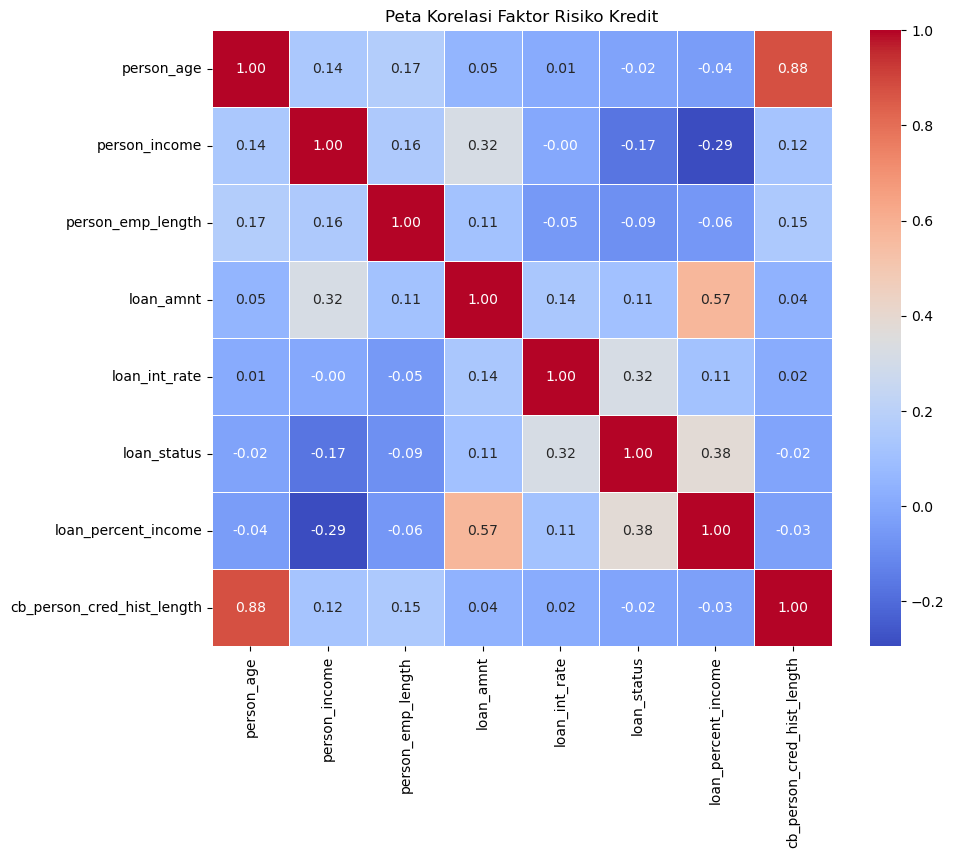

In [2]:
#Hitung korelasi hanya untuk kolom angk
korelasi = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
#Heatmap
sns.heatmap(
    korelasi, 
    annot=True,       # Tampilkan angkanya
    cmap='coolwarm',  # Warna: Merah (Panas) vs Biru (Dingin)
    fmt=".2f",        # Format angka 2 desimal
    linewidths=0.5
)

plt.title('Peta Korelasi Faktor Risiko Kredit')
plt.show()

In [3]:
# --- PREPROCESSING DATA ---

# 1. Pilih kolom-kolom yang isinya TEKS (Kategori)
kolom_kategori = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

# 2. Lakukan One-Hot Encoding
# drop_first=True artinya kita buang 1 kolom untuk hemat memori & hindari duplikasi info
# (Misal: Kalau bukan RENT dan bukan OWN, pasti MORTGAGE. Jadi kolom MORTGAGE bisa dibuang)
df_siap_ml = pd.get_dummies(df, columns=kolom_kategori, drop_first=True, dtype=int)

# 3. Cek hasilnya
print("Data Asli (Kolom):", len(df.columns))
print("Data Setelah Encoding (Kolom):", len(df_siap_ml.columns))

display(df_siap_ml.head())

Data Asli (Kolom): 12
Data Setelah Encoding (Kolom): 23


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [4]:
# 1. Definisikan X (Semua kolom KECUALI 'loan_status')
X = df_siap_ml.drop('loan_status', axis=1)

# 2. Definisikan y (HANYA kolom 'loan_status')
y = df_siap_ml['loan_status']

# Cek isinya
print("Dimensi X (Fitur):", X.shape)
print("Dimensi y (Target):", y.shape)

Dimensi X (Fitur): (32574, 22)
Dimensi y (Target): (32574,)


In [5]:
from sklearn.model_selection import train_test_split

# Pecah data: 80% Training, 20% Testing
# random_state=42 agar hasil acakannya konsisten (kita dapat hasil yang sama)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data berhasil dipisahkan!")
print(f"Jumlah Data Latih (Training): {len(X_train)} baris")
print(f"Jumlah Data Uji (Testing): {len(X_test)} baris")

✅ Data berhasil dipisahkan!
Jumlah Data Latih (Training): 26059 baris
Jumlah Data Uji (Testing): 6515 baris


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Inisialisasi Model (Memanggil "Otak" Random Forest)
# n_estimators=100 artinya kita pakai 100 "pohon keputusan" untuk berpikir
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Training (Proses Belajar)
print("Sedang melatih model... (Tunggu sebentar)")
model.fit(X_train, y_train)

# 3. Testing (Ujian)
# Kita minta model menebak jawaban untuk soal X_test
y_pred = model.predict(X_test)

# 4. Evaluasi (Cek Nilai)
akurasi = accuracy_score(y_test, y_pred)
print(f"✅ Selesai!")
print(f"Akurasi Model: {akurasi:.2%}")

Sedang melatih model... (Tunggu sebentar)
✅ Selesai!
Akurasi Model: 93.43%


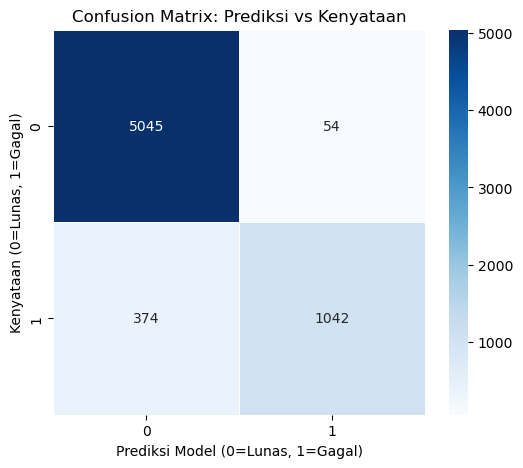


--- LAPORAN KLASIFIKASI ---
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5099
           1       0.95      0.74      0.83      1416

    accuracy                           0.93      6515
   macro avg       0.94      0.86      0.89      6515
weighted avg       0.94      0.93      0.93      6515



In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Gambar Heatmap biar gampang dibaca
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix: Prediksi vs Kenyataan')
plt.xlabel('Prediksi Model (0=Lunas, 1=Gagal)')
plt.ylabel('Kenyataan (0=Lunas, 1=Gagal)')
plt.show()

# 3. Tampilkan Laporan Lengkap
print("\n--- LAPORAN KLASIFIKASI ---")
print(classification_report(y_test, y_pred))

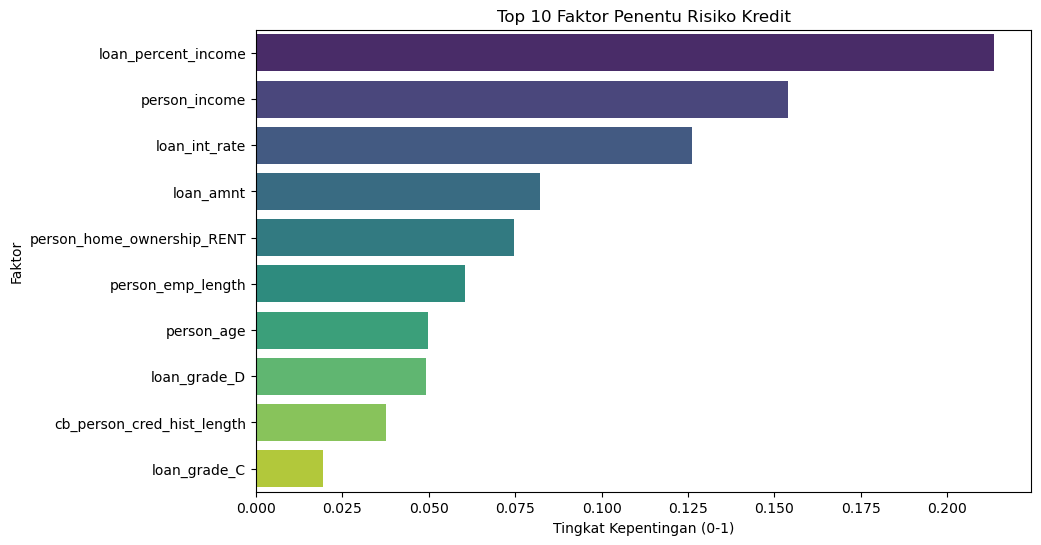

In [11]:
importance = model.feature_importances_
nama_fitur = X.columns

df_imp = pd.DataFrame({
    'Fitur': nama_fitur,
    'Pentingnya': importance
})

df_imp = df_imp.sort_values('Pentingnya', ascending=False).head(10)

# Gambar Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Pentingnya', y='Fitur', data=df_imp, palette='viridis', hue='Fitur', legend=False)
plt.title('Top 10 Faktor Penentu Risiko Kredit')
plt.xlabel('Tingkat Kepentingan (0-1)')
plt.ylabel('Faktor')
plt.show()

In [12]:
# --- EKSPOR HASIL PREDIKSI KE CSV ---

# 1. Mendapatkan Probabilitas Prediksi
# Menggunakan X (data yang sudah di-encode) untuk memprediksi probabilitas kelas 1 (Gagal Bayar)
# .predict_proba() mengembalikan array [prob_0, prob_1], kita ambil indeks [:, 1]
probabilitas_gagal = model.predict_proba(X)[:, 1]

# 2. Menggabungkan Hasil dengan Data Asli
# Menggunakan df.copy() agar data asli tidak berubah
# Kita gunakan 'df' (data awal sebelum encoding) agar kolom kategori tetap terbaca (e.g. 'RENT', 'EDUCATION')
df_final = df.copy()
df_final['Skor_Risiko'] = probabilitas_gagal

# 3. Membuat Label Prediksi Biner
# Threshold default adalah 0.5. Jika probabilitas > 0.5, diklasifikasikan sebagai 1 (Risiko Tinggi)
df_final['Prediksi_Model'] = (df_final['Skor_Risiko'] > 0.5).astype(int)

# 4. Menyimpan ke File CSV
output_filename = "hasil_prediksi_credit_risk.csv"
df_final.to_csv(output_filename, index=False)

# Verifikasi output
print(f"File berhasil disimpan: {output_filename}")
print(f"Dimensi data final: {df_final.shape}")

# Preview data untuk memastikan kolom baru terbentuk dengan benar
cols_preview = ['person_income', 'loan_percent_income', 'loan_status', 'Skor_Risiko', 'Prediksi_Model']
display(df_final[cols_preview].head())

File berhasil disimpan: hasil_prediksi_credit_risk.csv
Dimensi data final: (32574, 14)


,person_income,loan_percent_income,loan_status,Skor_Risiko,Prediksi_Model
1,9600,0.10,0,0.11,0
2,9600,0.57,1,0.99,1
3,65500,0.53,1,0.96,1
4,54400,0.55,1,0.99,1
5,9900,0.25,1,0.93,1
